# **Kegiatan Modul 6**

**Poin penilaian :**

* Tingkat kesesuaian program
* Kesesuaian step preprocessing dan pemodelan
* Pemahaman materi
* Kerapian kode program
* Tidak ada error

## **Customer Segmentation with K-Means**

Bayangkan Anda memiliki dataset pelanggan, dan Anda perlu menerapkan segmentasi pelanggan pada data historis ini.
Segmentasi pelanggan adalah praktik mempartisi basis pelanggan menjadi kelompok-kelompok individu yang memiliki karakteristik serupa. Ini adalah strategi yang signifikan karena bisnis dapat menargetkan kelompok pelanggan tertentu ini dan secara efektif mengalokasikan sumber daya pemasaran. Misalnya, satu grup mungkin berisi pelanggan yang untung tinggi dan berisiko rendah, yaitu, lebih mungkin membeli produk, atau berlangganan layanan. Tugas bisnis adalah mempertahankan pelanggan tersebut. Grup lain mungkin termasuk pelanggan dari organisasi nirlaba. Dan seterusnya.

In [ ]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-02-14 03:44:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.01s   

2020-02-14 03:44:16 (2.72 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import random 
%matplotlib inline

## **Load Data From CSV File**

Sebelum Anda dapat bekerja dengan data, Anda harus menggunakan URL untuk mendapatkan Cust_Segmentation.csv. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/dJtsP6g/1.png" align = "center">

In [26]:
# TULIS CODE ANDA DISINI
import pandas as pd
import numpy as np

url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv"
df = pd.read_csv(url)
df.head()

Customer Id  Age  Edu  ...  Defaulted  Address  DebtIncomeRatio
0            1   41    2  ...        0.0   NBA001              6.3
1            2   47    1  ...        0.0   NBA021             12.8
2            3   33    2  ...        1.0   NBA013             20.9
3            4   29    2  ...        0.0   NBA009              6.3
4            5   47    1  ...        0.0   NBA008              7.2

[5 rows x 10 columns]

## **Pre-processing**

Seperti yang Anda lihat, __Address__ dalam dataset ini adalah variabel kategorikal. Algoritma k-means tidak secara langsung berlaku untuk variabel kategori karena fungsi jarak Euclidean tidak benar-benar bermakna untuk variabel diskrit. Jadi, mari jatuhkan fitur ini dan jalankan pengelompokan. **10 poin**

```
# Output
```
<img src = "https://i.ibb.co/X7yGzKX/2.png" align = "center">


In [27]:
# TULIS CODE ANDA DISINI
df.drop('Address', axis=1, inplace=True)
df.head(5)

Customer Id  Age  Edu  ...  Other Debt  Defaulted  DebtIncomeRatio
0            1   41    2  ...       1.073        0.0              6.3
1            2   47    1  ...       8.218        0.0             12.8
2            3   33    2  ...       5.802        1.0             20.9
3            4   29    2  ...       0.516        0.0              6.3
4            5   47    1  ...       8.908        0.0              7.2

[5 rows x 9 columns]

## **Normalizing over the standard deviation**

Sekarang mari kita normalkan dataset. Tapi mengapa kita perlu normalisasi? Normalisasi adalah metode statistik yang membantu algoritma berbasis matematika untuk menafsirkan fitur dengan besaran dan distribusi yang berbeda secara merata. Kami menggunakan __tandardScaler()__ untuk menormalkan dataset kami. **10 poin**




```
# Output

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])
        
```



In [28]:
# TULIS CODE ANDA DISINI
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
feature_df = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]
X = np.asarray(feature_df)
X=np.nan_to_num(X)
y = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## **Modeling**

Dalam contoh kami (jika kami tidak memiliki akses ke algoritma k-means), itu akan sama dengan menebak bahwa setiap kelompok pelanggan akan memiliki usia, pendapatan, pendidikan, dll tertentu, dengan beberapa tes dan eksperimen. Namun, dengan menggunakan K-means clustering, kita dapat melakukan semua proses ini dengan lebih mudah.

Mari kita terapkan k-means pada dataset kami, dan lihat label klaster. **20 poin**



```
# Contoh Output

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 1 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 0 2 0 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0
 0 2 2 0 2 0 2 2 0 2 0 2 2 1 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0 2 2
 0 2 2 2 0 2 1 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 0 2 0 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0]
```



In [19]:
from sklearn.cluster import KMeans


kmeans = KMeans( init="k-means++",
        n_clusters=3,
        n_init=12)
kmeans.fit(y)
l=kmeans.labels_
print(l)

[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 1 0 1 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 1 0 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 2 2 0 0 0 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 1 0 0 2 0 0 1 1 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 0 0 2 0
 2 0 0 0 0 0 1 2 2 0 1 0 

## **Insights**

Tetapkan label klaster untuk setiap baris dalam dataframe. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/7gbF6TS/3.png" align = "center">

In [20]:
# TULIS CODE ANDA DISINI
from sklearn.cluster import KMeans

predict=kmeans.predict(y)

df['Clus_km'] = pd.Series(predict, index=df.index)

df

Customer Id  Age  Edu  ...  Defaulted  DebtIncomeRatio  Clus_km
0              1   41    2  ...        0.0              6.3        0
1              2   47    1  ...        0.0             12.8        1
2              3   33    2  ...        1.0             20.9        2
3              4   29    2  ...        0.0              6.3        0
4              5   47    1  ...        0.0              7.2        1
..           ...  ...  ...  ...        ...              ...      ...
845          846   27    1  ...        NaN              6.8        0
846          847   28    2  ...        0.0              7.0        0
847          848   25    4  ...        1.0             33.4        2
848          849   32    1  ...        0.0              2.9        0
849          850   52    1  ...        0.0              8.6        1

[850 rows x 10 columns]

Kita dapat dengan mudah memeriksa nilai centroid dengan rata-rata fitur di setiap kluster. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/QdhLVSX/4.png" align = "center">

In [21]:
# TULIS CODE ANDA DISINI

df.groupby('Clus_km').mean()

Customer Id        Age  ...  Defaulted  DebtIncomeRatio
Clus_km                          ...                            
0         426.122905  33.817505  ...   0.000000         7.964991
1         424.408163  43.000000  ...   0.162393        13.915646
2         424.451807  31.891566  ...   0.993939        13.994578

[3 rows x 9 columns]

Sekarang, mari kita lihat distribusi pelanggan berdasarkan usia dan pendapatan mereka: **15 poin**

```
# Output
```
<img src = "https://i.ibb.co/dPhLWM2/5.png" align = "center">

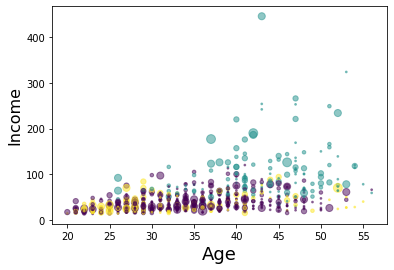

In [33]:
# TULIS CODE ANDA DISINI
import matplotlib.pyplot as plt

area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=l.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

Sekarang, buat plot dengan 3 parameter education, age dan income: **15 poin**

```
# Output
```
<img src = "https://i.ibb.co/kcx2LFp/6.png" align = "center">

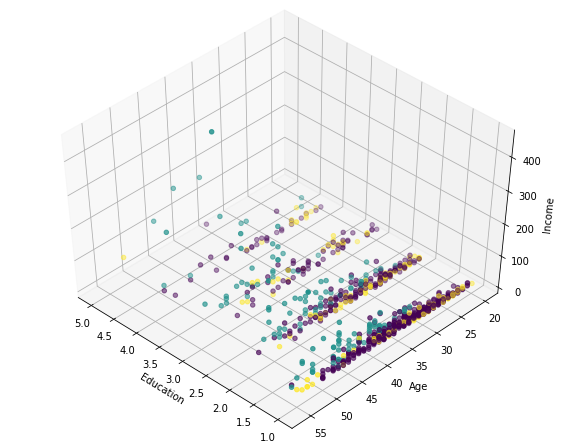

In [24]:
# TULIS CODE ANDA DISINI
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= l.astype(np.float))

Jelaskan kesimpulan dari hasil yang anda dapatkan dari kegiatan terkait segmentasi pelanggan diatas kepada asisten **20 poin**